==LABEL DETECTION START==

Target file


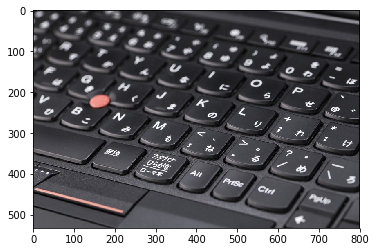

Vision api response:

{
  "labelAnnotations": [
    {
      "mid": "/m/01m2v",
      "description": "Computer keyboard",
      "score": 0.97336656,
      "topicality": 0.97336656
    },
    {
      "mid": "/m/0bs7_0t",
      "description": "Electronic device",
      "score": 0.9323289,
      "topicality": 0.9323289
    },
    {
      "mid": "/m/07c1v",
      "description": "Technology",
      "score": 0.9242807,
      "topicality": 0.9242807
    },
    {
      "mid": "/m/02dwgb",
      "description": "Input device",
      "score": 0.9064784,
      "topicality": 0.9064784
    },
    {
      "mid": "/m/03rb85",
      "description": "Space bar",
      "score": 0.90182996,
      "topicality": 0.90182996
    }
  ]
}


In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from base64 import b64encode
from sys import argv
import json
import requests

def main():
    ENDPOINT_URL = 'https://vision.googleapis.com/v1/images:annotate'
    TESTING_IMAGE = './images/keybord.png'

    api_key_file = open("api_key", "r")
    api_key = api_key_file.read()

    print("==LABEL DETECTION START==\n")
    print("Target file")
    

    %matplotlib inline
    im = Image.open(TESTING_IMAGE)
    plt.imshow(np.asarray(im))
    plt.show()

    image_requests = {}
    with open(TESTING_IMAGE, 'rb') as f:
            ctxt = b64encode(f.read()).decode()
            image_requests['image'] = {'content': ctxt}
            image_requests['features'] = [{ 'type': 'LABEL_DETECTION', 'maxResults': 5 }]

    response = requests.post(ENDPOINT_URL,
                             data=json.dumps({"requests": image_requests}).encode(),
                             params={'key': api_key},
                             headers={'Content-Type': 'application/json'})

    print("Vision api response:\n")
    for idx, resp in enumerate(response.json()['responses']):
        print(json.dumps(resp, indent=2))

if __name__ == "__main__":
    main()